# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
clouds = []
country = []
date = []
humidity = []
lat = []
lng = [] 
maxTemp = []
windSpeed = []
cities2 = []
count = 0

In [26]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    full_url = query_url + city
    weather = requests.get(full_url)
    jsonWeather = weather.json()
    try:
        clouds.append(jsonWeather['clouds']['all'])
        country.append(jsonWeather['sys']['country'])
        date.append(time.time())
        humidity.append(jsonWeather['main']['humidity'])
        lat.append(jsonWeather['coord']['lat'])
        lng.append(jsonWeather['coord']['lon'])
        maxTemp.append(jsonWeather['main']['temp_max'])
        windSpeed.append(jsonWeather['wind']['speed'])
        cities2.append(city)
        count += 1
        print(f"Processing Record {count} | {city}")
    except KeyError:
        print("City not found. How embarasing, skipping...")
        
print("End of Data Retrieval")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | hithadhoo
Processing Record 2 | jamestown
Processing Record 3 | dingle
Processing Record 4 | san cristobal
Processing Record 5 | kapaa
Processing Record 6 | ruwi
Processing Record 7 | rikitea
Processing Record 8 | sitka
Processing Record 9 | hermanus
Processing Record 10 | grand forks
Processing Record 11 | busselton
City not found. How embarasing, skipping...
Processing Record 12 | puerto ayora
Processing Record 13 | utete
Processing Record 14 | miquelon
Processing Record 15 | salalah
Processing Record 16 | namibe
City not found. How embarasing, skipping...
Processing Record 17 | mpika
Processing Record 18 | khatanga
Processing Record 19 | dunedin
Processing Record 20 | albany
Processing Record 21 | wilmington
Processing Record 22 | sao gabriel da cachoeira
Processing Record 23 | punta arenas
Processing Record 24 | xuddur
Processing Record 25 | bismarck
Processing Record 26 | yerbogachen
Processing Record 27 

Processing Record 223 | coquimbo
Processing Record 224 | san quintin
Processing Record 225 | port-gentil
City not found. How embarasing, skipping...
Processing Record 226 | lavrentiya
Processing Record 227 | kiruna
Processing Record 228 | port hardy
Processing Record 229 | victoria
Processing Record 230 | aldan
Processing Record 231 | batagay-alyta
Processing Record 232 | haverfordwest
Processing Record 233 | kijang
Processing Record 234 | lorengau
Processing Record 235 | ibra
Processing Record 236 | naron
Processing Record 237 | xiamen
Processing Record 238 | lasa
Processing Record 239 | uspenka
Processing Record 240 | faya
Processing Record 241 | svetlaya
Processing Record 242 | atbasar
Processing Record 243 | ahipara
Processing Record 244 | dicabisagan
Processing Record 245 | gold coast
Processing Record 246 | loum
Processing Record 247 | uglovka
Processing Record 248 | olinda
Processing Record 249 | saint anthony
Processing Record 250 | sawtell
Processing Record 251 | rawson
Proces

Processing Record 437 | tecoanapa
City not found. How embarasing, skipping...
Processing Record 438 | nizhnevartovsk
Processing Record 439 | oktyabrskiy
Processing Record 440 | bandarbeyla
Processing Record 441 | rondonopolis
City not found. How embarasing, skipping...
Processing Record 442 | longkou
Processing Record 443 | virden
Processing Record 444 | canakkale
Processing Record 445 | sao luiz gonzaga
Processing Record 446 | allapalli
Processing Record 447 | oshikango
Processing Record 448 | tilichiki
Processing Record 449 | chernenko
Processing Record 450 | nakusp
Processing Record 451 | kosonsoy
City not found. How embarasing, skipping...
City not found. How embarasing, skipping...
City not found. How embarasing, skipping...
Processing Record 452 | san rafael
Processing Record 453 | oistins
Processing Record 454 | noumea
Processing Record 455 | tigre
Processing Record 456 | gushikawa
Processing Record 457 | khani
City not found. How embarasing, skipping...
Processing Record 458 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
cities_dict = {
    "City": cities2,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed
}
cities_df = pd.DataFrame(cities_dict)
cities_df.to_csv(output_data_file)
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,100,MV,1.570130e+09,77,-0.60,73.08,82.70,15.79
1,jamestown,21,AU,1.570130e+09,76,-33.21,138.60,55.13,11.96
2,dingle,93,PH,1.570130e+09,88,11.00,122.67,73.94,2.51
3,san cristobal,67,HN,1.570130e+09,57,14.68,-86.92,81.88,4.63
4,kapaa,40,US,1.570130e+09,70,22.08,-159.32,84.20,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

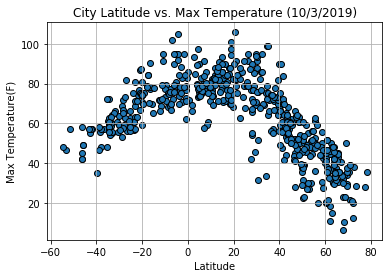

In [29]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], marker='o', edgecolor = 'black')
dateList = time.localtime(time.time())
ASdate = str(dateList[1]) + '/' + str(dateList[2]) + '/' + str(dateList[0])
plt.title(f'City Latitude vs. Max Temperature ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("LatVSTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

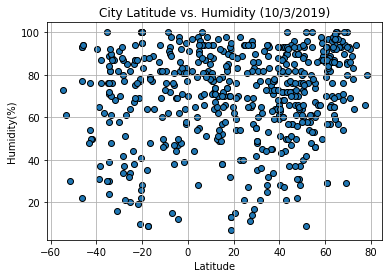

In [30]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Humidity ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("LatVSHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

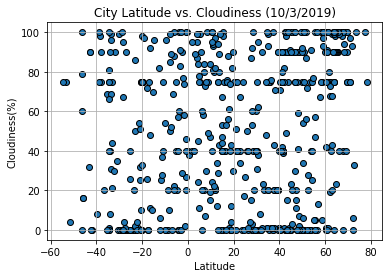

In [31]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Cloudiness ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("LatVSClouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

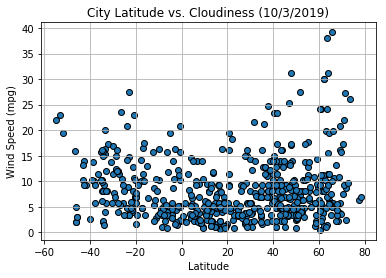

In [32]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Cloudiness ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.savefig("LatVSWSpeed.png")
plt.show()